In [1]:
from LIBRERIAS import *

In [2]:
# Extraccion y Modificación del DataFrame.

url= ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

abalones= pd.read_csv(url, header=None)

abalones.columns= ["Sex", "Lenght", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]

abalones= abalones.drop("Sex", axis=1)

In [3]:
abalones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lenght          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole Weight    4177 non-null   float64
 4   Shucked Weight  4177 non-null   float64
 5   Viscera Weight  4177 non-null   float64
 6   Shell Weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [4]:
abalones.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalones.describe(percentiles=(.25, .5, .75)).transpose()

,count,mean,std,min,25%,50%,75%,max
Lenght,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole Weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked Weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera Weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell Weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [6]:
abalones.corr()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Lenght,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [7]:
# Y:  "Rings" Datos dependientes
#X: Datos Independependietes
X,Y= abalones.loc[:,abalones.columns != "Rings"], abalones.loc[:,"Rings"]

x= X.values
y= Y.values

# Datos de Entrenamiento y Datos de Testeo

X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=12345)

In [8]:
#Datos Previamente Analizado
nuevos_datos={"Length": 0.569552, "Diameter": 0.446407, "Heigth": 0.154437, "Whole_Weight": 1.016849, "Shucked_Weight": 0.439051, "Viscera_Weight": 0.222526 , "Shell_Weight": 0.291208}

datos= [nuevos_datos["Length"], nuevos_datos["Diameter"], nuevos_datos["Heigth"], nuevos_datos["Whole_Weight"], nuevos_datos["Shucked_Weight"], nuevos_datos["Viscera_Weight"], nuevos_datos["Shell_Weight"]]

nuevo_punto_especimen= np.array(datos)


In [9]:
# De acuerdo con el mejoramiento de complejdad del modelo el valor de K adecuado es= 45  por lo tanto:

K= 45


In [10]:
# Se va a emplear el Algortimo KNN Afinado mediante Bagging

#Algortimo KNN GridSearch

parameters= {"n_neighbors": [K]}

GridSearch_CV= GridSearchCV(KNeighborsRegressor(), parameters)

GridSearch_CV.fit(X_train, Y_train)

GridSearch_CV.best_params_

GridSearch_CV_Train= GridSearch_CV.predict(X_train)

GridSearch_CV_Test= GridSearch_CV.predict(X_test)

print (f"Score GridSearchCV: {GridSearch_CV.score(X_test, Y_test)}")

#Algortimo KNN GridSearch_afinado

parameters= {"n_neighbors": [K],"weights":["uniform",  "distance"]}

GridSearch_afinado= GridSearchCV(KNeighborsRegressor(), parameters)

GridSearch_afinado.fit(X_train, Y_train)

GridSearch_afinado.best_params_

TEST_GRIDSEARCH_Predict=GridSearch_afinado.predict(X_test) #X_train en vez de X_test

print(f"Score GridSearchCV_Afinado: {GridSearch_afinado.score(X_test, Y_test)}")

#Algoritmo KNN Bagging

best_k= GridSearch_afinado.best_params_["n_neighbors"]

best_weight= GridSearch_afinado.best_params_["weights"]

bagging_knn= KNeighborsRegressor(n_neighbors=best_k, weights= best_weight)

KNN_Bagging_Model= BaggingRegressor(bagging_knn, n_estimators= 100)

KNN_Bagging_Model.fit( X_train, Y_train)

print (f"Score GridSearchCV_Baggin:{KNN_Bagging_Model.score(X_test, Y_test)}")


Score GridSearchCV: 0.5571474922954613
Score GridSearchCV_Afinado: 0.5625767373997524
Score GridSearchCV_Baggin:0.561358368912092


# Cálculo Errores

In [11]:
#Algoritmo KNN GriSearchCV
MSE_KNN_GridsearchCV= mean_squared_error(Y_test, GridSearch_CV_Test)

RMSE_KNN_GridsearchCV= sqrt(MSE_KNN_GridsearchCV)

print (f"MSE KNN GridSearch CV: {MSE_KNN_GridsearchCV}")

print(f"RMSE KNN GridSearch CV: {RMSE_KNN_GridsearchCV}")

MSE KNN GridSearch CV: 4.831596668438774
RMSE KNN GridSearch CV: 2.1980893222157225


In [12]:
# Algoritmo KNN GridSearchCV Afinado

MSE_KNN_GAFINADO= mean_squared_error(Y_test, TEST_GRIDSEARCH_Predict)

RMSE_KNN_GAFINADO= sqrt(MSE_KNN_GAFINADO)

print (f"MSE KNN GridSearch CV Afinado: {MSE_KNN_GAFINADO}")

print(f"RMSE KNN GridSearch CV Afinado: {RMSE_KNN_GAFINADO}")

MSE KNN GridSearch CV Afinado: 4.772362674949609
RMSE KNN GridSearch CV Afinado: 2.18457379709398


In [13]:
#Algoritmo KNN Bagging

MSE_KNN_Bagging= mean_squared_error(Y_test, TEST_GRIDSEARCH_Predict)

RMSE_KNN_Bagging= sqrt(MSE_KNN_Bagging)

print (f"MSE KNN Bagging: {MSE_KNN_Bagging}")

print(f"RMSE KNN Bagging: {RMSE_KNN_Bagging}")


MSE KNN Bagging: 4.772362674949609
RMSE KNN Bagging: 2.18457379709398


Predicciones nuevo_punto_especimen= np.array(datos)

In [14]:
# Distancias Euclidianas

distancias_euclidianas= np.linalg.norm(x-nuevo_punto_especimen, axis= 1)

nearest_neigbors_ids= distancias_euclidianas.argsort()[:K] 

nearest_neigbors_ids= Y[nearest_neigbors_ids]

In [15]:
# Algoritmo KNN Simple Predicción de Edad

KNN_model= KNeighborsRegressor(n_neighbors= K)

KNN_model.fit( X_train, Y_train)

KNN_model= Y[nearest_neigbors_ids]

prediccion_KNN= KNN_model.mean()

print (f"Predicción Edad KNN Simple:{prediccion_KNN}")

Predicción Edad KNN Simple:13.333333333333334


In [16]:
# Prediccion de Edad KNN GridSearchCV 

GridSearch_CV= Y[nearest_neigbors_ids]

prediccion_KNN_GridsearchCV= GridSearch_CV.mean()

print (f"Predicción Edad KNN GridSearchCV:{prediccion_KNN_GridsearchCV}")

Predicción Edad KNN GridSearchCV:13.333333333333334


In [17]:
# Predicción de Edad GridSearchCV Afinado

GridSearch_afinado= Y[nearest_neigbors_ids]

prediccion_KNN_GridSearch_afinado= GridSearch_afinado.mean()

print(f"Predicción Edad KNN GridSearch Afinado:{prediccion_KNN_GridSearch_afinado}")

Predicción Edad KNN GridSearch Afinado:13.333333333333334


In [18]:
# Predicciones Empleando KNN Bagging Model con K=45

KNN_Bagging_Model= Y[nearest_neigbors_ids]

pred_KNN_Bagging_Model= KNN_Bagging_Model.mean()

print (f"Predicción de Edad KNN Bagging: {pred_KNN_Bagging_Model}")


Predicción de Edad KNN Bagging: 13.333333333333334


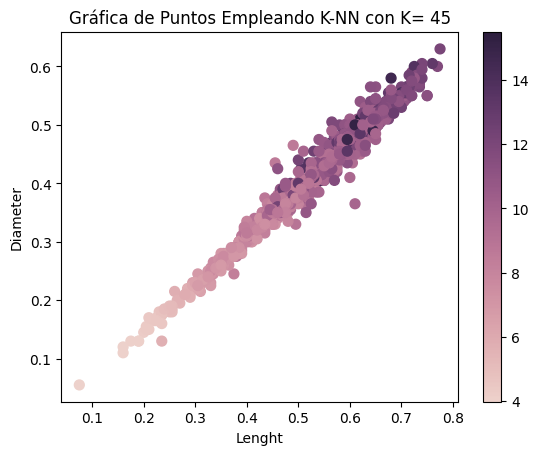

In [19]:
# Plot 

cmap= sns.cubehelix_palette(as_cmap= True)

f,ax= plt.subplots()

points= ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c= GridSearch_CV_Test, s= 50, cmap= cmap)

plt.xlabel("Lenght")
plt.ylabel("Diameter")
plt.title("Gráfica de Puntos Empleando K-NN con K= 45")

f.colorbar(points)

plt.show()